# **Portfolio Optimization**

## **0. Introduccion Teorica:**
La Optimización de Carteras es un aspecto esencial de la inversión moderna, y la Teoría Moderna de Carteras (MPT) es un enfoque bien conocido para lograr una cartera óptima.

### **Optimización de Carteras**
##### **Diversificación:**

La diversificación es clave para la optimización de carteras. Al distribuir los fondos entre diferentes activos, se puede reducir el riesgo total de la cartera.
Rendimiento y Riesgo:

La optimización de carteras busca equilibrar el rendimiento deseado con el riesgo asumido. No se trata solo de maximizar el rendimiento, sino de hacerlo de manera eficiente en términos de riesgo.

#### **Asignación de Activos:**

Implica determinar la cantidad de dinero que se asignará a diferentes clases de activos, como acciones, bonos y otros instrumentos financieros.

#### **Retorno Esperado:**

Se busca maximizar el retorno esperado de la cartera, teniendo en cuenta las expectativas de rendimiento de los activos individuales y sus ponderaciones.

### **Teoría Moderna de Carteras (MPT):**
####**Frontera Eficiente:**

La MPT introduce la idea de la "Frontera Eficiente", que representa todas las carteras que ofrecen el mayor rendimiento para un nivel dado de riesgo o el menor riesgo para un nivel dado de rendimiento.

####**Rendimiento y Riesgo:**

MPT argumenta que los inversionistas deben evaluar las carteras no solo en términos de rendimiento absoluto sino considerando también la volatilidad o riesgo.

####**Indice de Sharpe:**

La MPT popularizó el uso del Índice de Sharpe, que mide la relación entre el rendimiento excedente de una cartera sobre la tasa libre de riesgo y su volatilidad.

#### **Diversificación Óptima:**

MPT sugiere que existe una combinación óptima de activos que maximiza el rendimiento esperado para un nivel de riesgo dado y viceversa.

####**Matriz de Covarianza:**

Utiliza la matriz de covarianza para evaluar la relación entre los rendimientos de diferentes activos, lo que ayuda a construir carteras eficientes y bien diversificadas.
Ratios de Sharpe y Sortino:

Además del Índice de Sharpe, la MPT también considera el Índice de Sortino, que se centra en la volatilidad negativa.
Pesos Óptimos:

MPT busca determinar los pesos óptimos de los activos en la cartera que maximizan la relación rendimiento/riesgo.

## **1. Tickers - Time Range**

In [5]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from scipy.optimize import minimize




In [6]:
tickers = ['SPY','BND','GLD','QQQ','VTI']
end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

## **2. Adjusted Close Prices**

In [7]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
print(adj_close_df)

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2018-12-19  230.208420  69.576485  117.430000  149.475739  117.987030
2018-12-20  226.461121  69.479767  119.239998  147.309006  116.082535
2018-12-21  221.821014  69.479767  118.720001  142.743393  113.616821
2018-12-24  215.959869  69.495636  120.019997  139.203644  110.776588
2018-12-26  226.871185  69.345749  119.660004  147.895416  116.107193
...                ...        ...         ...         ...         ...
2023-12-11  460.124451  71.830002  183.589996  395.519989  229.789993
2023-12-12  462.225952  72.040001  183.490005  398.670013  230.660004
2023-12-13  468.600098  72.959999  187.630005  403.739990  234.240005
2023-12-14  470.104004  73.510002  188.729996  403.390015  235.630005
2023-12-15  469.329987  73.400002  187.000000  405.339996  235.309998

[1257 rows x 5 columns]


## **3. Log Returns**
Los rendimientos logarítmicos son fundamentales en finanzas cuantitativas, donde se utilizan para la valoración de opciones, simulaciones de Monte Carlo y otros modelos financieros.
Los rendimientos logarítmicos se calculan tomando el logaritmo natural de la razón entre el precio actual y el precio anterior. La fórmula es:
�
�
=
ln
⁡
(
�
�
�
�
−
1
)
R
t
​
 =ln(
P
t−1
​

P
t
​

​
 ) donde
�
�
R
t
​
  es el rendimiento logarítmico en el período
�
t,
�
�
P
t
​
  es el precio en el período
�
t, y
�
�
−
1
P
t−1
​
  es el precio en el período anterior.

In [11]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2018-12-19,NaN,NaN,NaN,NaN,NaN
2018-12-20,-0.016412,-0.001391,0.015296,-0.014602,-0.016273
2018-12-21,-0.020702,0.000000,-0.004370,-0.031484,-0.021470
2018-12-24,-0.026778,0.000228,0.010891,-0.025111,-0.025316
2018-12-26,0.049290,-0.002159,-0.003004,0.060567,0.046998
...,...,...,...,...,...
2023-12-11,0.003882,0.000139,-0.011104,0.008506,0.004099
2023-12-12,0.004557,0.002919,-0.000545,0.007933,0.003779
2023-12-13,0.013696,0.012690,0.022312,0.012637,0.015401


In [12]:
log_returns = log_returns.dropna()

## **4.  Covariance Matrix**

En finanzas, la matriz de covarianza se utiliza comúnmente para modelar la variabilidad conjunta de los rendimientos de diferentes activos en una cartera. Al construir la matriz de covarianza de los rendimientos, los inversores pueden evaluar el riesgo total de la cartera y optimizar la asignación de activos para lograr una cartera eficiente seguiendo los lineamientos Teoría Moderna de Carteras (MPT)

In [14]:
cov_matrix = log_returns.cov() * 252
cov_matrix

,SPY,BND,GLD,QQQ,VTI
SPY,0.045208,0.002650,0.003235,0.050982,0.046227
BND,0.002650,0.004578,0.003840,0.003270,0.002813
GLD,0.003235,0.003840,0.022403,0.004502,0.003400
QQQ,0.050982,0.003270,0.004502,0.066087,0.052079
VTI,0.046227,0.002813,0.003400,0.052079,0.047644


## **5. Portfolio Performance Metrics**
Las métricas de desempeño de carteras son herramientas clave en finanzas que permiten evaluar y comparar el rendimiento de una cartera de activos. Aquí, definimos funciones para calcular la desviación estándar de la cartera, el rendimiento esperado y la ratio de Sharpe.

### **Desviación Estándar de la Cartera:**
La desviación estándar de una cartera mide la variabilidad o riesgo total de la cartera. Se calcula teniendo en cuenta las ponderaciones de cada activo en la cartera y las covarianzas entre los rendimientos de los activos.

### **Rendimiento Esperado de la Cartera:**
El rendimiento esperado de una cartera es la suma ponderada de los rendimientos esperados de los activos individuales.

### **Ratio de Sharpe:**
El índice de Sharpe mide la rentabilidad excedente de una cartera en relación con la tasa libre de riesgo, ajustando el rendimiento por la volatilidad.


In [15]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

## **6. Portfolio Optimization**

### **Risk Free Rate**

La tasa libre de riesgo a menudo se asocia con inversiones en activos financieros considerados libres de riesgo, usualmente se asocia con los bonos del gobierno americano. Estos bonos se consideran "libres de riesgo" en el sentido de que se espera que el gobierno cumpla con sus obligaciones de pago.

In [29]:
#GS10

ten_years_rate = pd.read_csv("/content/GS10.csv")
print(ten_years_rate.tail())


           DATE  GS10
843  2023-07-01  3.90
844  2023-08-01  4.17
845  2023-09-01  4.38
846  2023-10-01  4.80
847  2023-11-01  4.50


In [30]:
risk_free_rate = ten_years_rate.iloc[-1]
print(risk_free_rate.tail())

DATE    2023-11-01
GS10           4.5
Name: 847, dtype: object


### **Negative Sharpe ratio**

El índice de Sharpe negativo, o "negative Sharpe ratio" en inglés, indica un rendimiento ajustado al riesgo inferior al rendimiento de una inversión sin riesgo. Es importante entender que un índice de Sharpe negativo generalmente sugiere que la inversión o cartera está proporcionando un rendimiento inferior al rendimiento de una inversión sin riesgo.

In [32]:

def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)





In [33]:
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for _ in range(len(tickers))]
initial_weights = np.array([1/len(tickers)]*len(tickers))

In [36]:
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

In [37]:
optimal_weights = optimized_results.x

##**7. Portfolio Analytics**

In [38]:
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SPY: 0.1994
BND: 0.0006
GLD: 0.4000
QQQ: 0.4000
VTI: 0.0000
Expected Annual Return: 0.1459
Expected Volatility: 0.1614
Sharpe Ratio: 0.7801


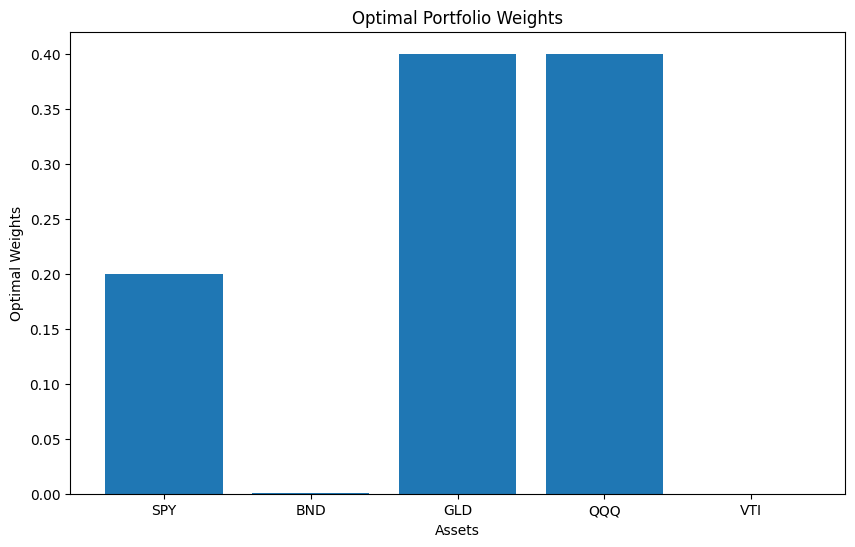

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()